In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
image_path = "/miniscratch/tengmeli/duckietown/sim_dataset_object/dataset_duckietown_vf/3510.npz"

# See ground truth

In [3]:
data = np.load(image_path)
image = data['arr_0']
box = data['arr_1']
classes = data['arr_2']

In [4]:
image.shape

(224, 224, 3)

In [5]:
img = image.copy()

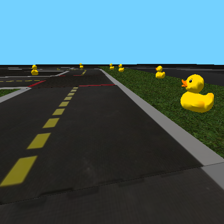

In [6]:
Image.fromarray(img)

In [7]:
for i,elem in enumerate(box):
    if classes[i]==1:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(200,0,0),1)
    if classes[i]==2:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,0,200),1)
    if classes[i]==3:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,200,200),1)
    if classes[i]==4:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,200,0),1)

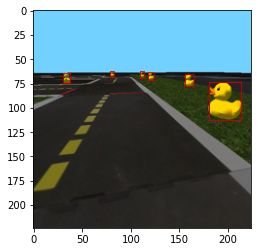

In [8]:
plt.imshow(img)

# Check model prediction

In [9]:
from train import DuckieDataset
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [10]:
model_path = '../ooo.pth'

In [11]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 5

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.load_state_dict(torch.load(model_path,  map_location=device)['model'])
                      

<All keys matched successfully>

In [16]:
model.eval()

img = image.copy()

In [13]:
dataset = DuckieDataset(
        "/miniscratch/tengmeli/duckietown/sim_dataset_object/dataset_duckietown_vf/", domain="sim", transforms=None
    )

    # split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])

import utils as u
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=1, shuffle=True, num_workers=4, collate_fn=u.collate_fn
)

In [28]:
input_ = (torch.Tensor(np.transpose(img/255,(2,0,1)))).unsqueeze(0)

In [29]:
out = model(input_)

In [31]:
box = out[0]['boxes']
classes = out[0]['labels']

In [32]:
t = image.copy()

In [34]:
for i,elem in enumerate(box):
    elem = elem
    if classes[i]==1:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(t,(xmin,ymin),(xmax,ymax),(200,0,0),1)
    if classes[i]==2:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(t,(xmin,ymin),(xmax,ymax),(0,0,200),1)
    if classes[i]==3:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(t,(xmin,ymin),(xmax,ymax),(0,200,200),1)
    if classes[i]==4:
        xmin, ymin, xmax, ymax = elem
        cv2.rectangle(t,(xmin,ymin),(xmax,ymax),(0,200,0),1)

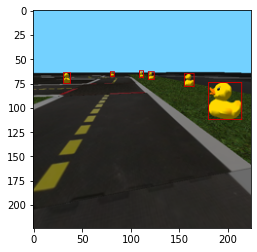

In [35]:
plt.imshow(t)